In [ ]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), '../../../'))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from scripts.data_loading import load_dataset
from scripts.data_description import *
from scripts.text_analysis import *
from scripts.time_series_analysis import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kaleb/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
stock_data = pd.read_csv("../../../data/yfinance_data/AAPL_historical_data.csv")

print(stock_data.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [ ]:
news_data = load_dataset('../../../data/raw_analyst_ratings.csv')
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [9]:
def extract_date_features(df, date_column):
    """
    Extract and analyze date-related features from the dataset.
    """
    df[date_column] = pd.to_datetime(df[date_column], utc=True, errors='coerce')
    df['day'] = df[date_column].dt.date
    df['month'] = df[date_column].dt.to_period('M')
    df['day_of_week'] = df[date_column].dt.day_name()
    return df
df = extract_date_features(news_data, 'date')
df.head()

/tmp/ipykernel_113900/1392032321.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df[date_column].dt.to_period('M')


,Unnamed: 0,headline,url,publisher,date,stock,day,month,day_of_week
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,2020-06-05,2020-06,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,2020-06-03,2020-06,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,2020-05-26,2020-05,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,2020-05-22,2020-05,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,2020-05-22,2020-05,Friday


In [17]:
news_data['Date'] = pd.to_datetime(news_data['day'])
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

news_data = news_data[news_data['stock'] == 'AAPL']

merged_df = pd.merge(news_data, stock_data, on='Date', how='inner') 

In [18]:
merged_df.head()

,Unnamed: 0,headline,url,publisher,date,stock,day,month,day_of_week,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 15:33:26+00:00,AAPL,2020-06-10,2020-06,Wednesday,2020-06-10,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
1,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10 12:14:08+00:00,AAPL,2020-06-10,2020-06,Wednesday,2020-06-10,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
2,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 11:53:47+00:00,AAPL,2020-06-10,2020-06,Wednesday,2020-06-10,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
3,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10 11:19:25+00:00,AAPL,2020-06-10,2020-06,Wednesday,2020-06-10,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
4,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10 10:27:11+00:00,AAPL,2020-06-10,2020-06,Wednesday,2020-06-10,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0


/home/kaleb/projects/kaim/KAIM-Week1/notebooks/eda/../../scripts/text_analysis.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = df[text_column].apply(lambda x: sia.polarity_scores(x)['compound'])
/home/kaleb/projects/kaim/KAIM-Week1/notebooks/eda/../../scripts/text_analysis.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = pd.cut(df['sentiment_score'], bins=[-1, -0.05, 0.05, 1], labels=['negative', 'neutral', 'positive'])


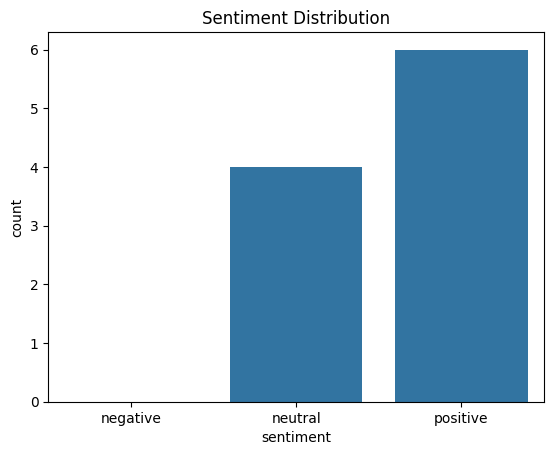

In [23]:
merged_df = perform_sentiment_analysis(merged_df.iloc[:100000, :], 'headline')

In [26]:
merged_df.head()

,Unnamed: 0,headline,url,publisher,date,stock,day,month,day_of_week,Date,...,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock_Return,sentiment_score,sentiment
0,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 15:33:26+00:00,AAPL,2020-06-10,2020-06,Wednesday,2020-06-10,...,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,NaN,0.5574,positive
1,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10 12:14:08+00:00,AAPL,2020-06-10,2020-06,Wednesday,2020-06-10,...,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,0.0,0.0000,neutral
2,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 11:53:47+00:00,AAPL,2020-06-10,2020-06,Wednesday,2020-06-10,...,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,0.0,0.2023,positive
3,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10 11:19:25+00:00,AAPL,2020-06-10,2020-06,Wednesday,2020-06-10,...,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,0.0,0.0000,neutral
4,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10 10:27:11+00:00,AAPL,2020-06-10,2020-06,Wednesday,2020-06-10,...,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,0.0,0.3818,positive


In [24]:
# Calculate daily stock returns
merged_df['Stock_Return'] = merged_df['Adj Close'].pct_change()  # Percentage change in closing prices


/tmp/ipykernel_113900/1797585125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Stock_Return'] = merged_df['Adj Close'].pct_change()  # Percentage change in closing prices


In [30]:
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
merged_df['sentiment'] = merged_df['sentiment'].map(sentiment_mapping)

In [31]:

correlation = merged_df[['sentiment', 'Stock_Return']].corr().iloc[0, 1]
print(f'Correlation between news sentiment and stock returns: {correlation}')


Correlation between news sentiment and stock returns: 0.3952847075210474
